In [1]:
# !pip install ultralytics opencv-python matplotlib

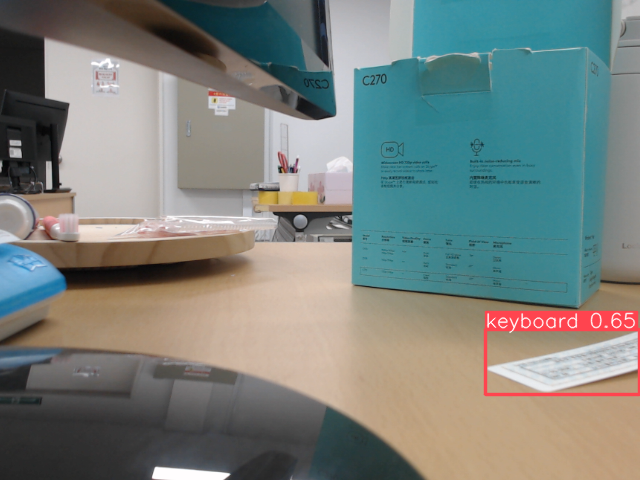


0: 480x640 1 tv, 1 keyboard, 202.2ms
Speed: 2.9ms preprocess, 202.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
# 셀 2: YOLO 모델 로드 및 영상 캡처 코드
from ultralytics import YOLO
import cv2
import threading
from IPython.display import display, clear_output
import PIL.Image
import numpy as np

# 모델 불러오기 (YOLOv8n: 경량 모델)
model = YOLO('yolov8n.pt')

# 웹캠 열기 (노트북 기본 카메라는 일반적으로 index 0)
cap = cv2.VideoCapture(1)

def detect_and_display():
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # 객체 탐지 수행
        results = model(frame)[0]
        annotated_frame = results.plot()

        # BGR → RGB 변환 후 이미지 표시
        img_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        pil_img = PIL.Image.fromarray(img_rgb)

        # Jupyter 출력
        clear_output(wait=True)
        display(pil_img)

        # 0.1초 대기 (프레임 속도 조절)
        if cv2.waitKey(100) & 0xFF == 27:
            break

# 스레드로 실행 (Jupyter에서 끊기지 않게)
threading.Thread(target=detect_and_display).start()


In [3]:
# # 객체 탐지 수행
# results = model(frame)[0]
# annotated_frame = results.plot()

# # === 🔍 객체별 정보 출력 ===
# boxes = results.boxes

# for i in range(len(boxes)):
#     cls_id = int(boxes.cls[i].item())
#     confidence = float(boxes.conf[i].item())
#     xyxy = boxes.xyxy[i].tolist()  # [x1, y1, x2, y2]

#     class_name = model.names[cls_id]
#     print(f"탐지된 객체: {class_name} (신뢰도: {confidence:.2f}), 좌표: {xyxy}")
